In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score

In [2]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

# Loading the data

In [3]:
generate_train_data = ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.3,
                                         zoom_range = 0.3,
                                         horizontal_flip = True)
generate_test_data = ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.3,
                                         zoom_range = 0.3,
                                         horizontal_flip = True)




In [4]:
training_dataset_folder = 'inputs/family-images/traindata'
testing_dataset_folder = 'inputs/family-images/testdata'

In [5]:
training_dataset = generate_train_data.flow_from_directory(training_dataset_folder,
                                                 target_size = (224, 224),
                                                 batch_size = 3,
                                                 
                                                 class_mode = 'categorical')
testing_dataset = generate_train_data.flow_from_directory(testing_dataset_folder,
                                                 target_size = (224, 224),
                                                 batch_size = 3,
                                                 
                                                 class_mode = 'categorical')



Found 150 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


# loading the test data

In [19]:
test_img_path = 'inputs/family-images/testdata/pundarikam/pundarikam (2).jpg'

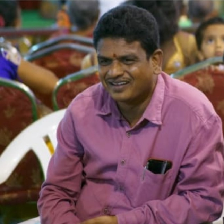

In [20]:
new_image = image.load_img(test_img_path, target_size = (224, 224))
new_image


In [21]:
new_image = image.img_to_array(new_image)
new_image = np.expand_dims(new_image, axis = 0)

# creating a model

In [9]:
vggmodel = VGG16()
last_layer = str(vggmodel.layers[-1])
classifier = Sequential()
for layer in vggmodel.layers:
    if str(layer) != last_layer:
        classifier.add(layer)
        pass
    pass
for layer in classifier.layers:
    layer.trainable=False
    
model = Sequential()
model.add(classifier)

model.add(Dense(3, activation='softmax'))

# compiling the model

In [10]:
model.compile(optimizer='RMSprop', loss='CategoricalCrossentropy', metrics=['accuracy'])


# training the model

In [11]:
model.fit(training_dataset,
                         steps_per_epoch = 7,
                         epochs = 20,
                         validation_data = testing_dataset,
                         validation_steps = 5,
                         shuffle=False)


Epoch 1/20
7/7 [==============================] - 12s 2s/step - loss: 2.1755 - accuracy: 0.4762 - val_loss: 3.6485 - val_accuracy: 0.0833
Epoch 2/20
7/7 [==============================] - 6s 820ms/step - loss: 2.2893 - accuracy: 0.2857
Epoch 3/20
7/7 [==============================] - 6s 792ms/step - loss: 2.3212 - accuracy: 0.3333
Epoch 4/20
7/7 [==============================] - 6s 819ms/step - loss: 1.2204 - accuracy: 0.5238
Epoch 5/20
7/7 [==============================] - 6s 823ms/step - loss: 1.2405 - accuracy: 0.4762
Epoch 6/20
7/7 [==============================] - 6s 805ms/step - loss: 1.7457 - accuracy: 0.2857
Epoch 7/20
7/7 [==============================] - 6s 797ms/step - loss: 1.4289 - accuracy: 0.3333
Epoch 8/20
7/7 [==============================] - 6s 799ms/step - loss: 1.3535 - accuracy: 0.4286
Epoch 9/20
7/7 [==============================] - 6s 803ms/step - loss: 1.8795 - accuracy: 0.2857
Epoch 10/20
7/7 [==============================] - 6s 795ms/step - loss: 1.600

# Prediction

In [22]:
result = model.predict(new_image)

In [23]:
result

array([[0.561081 , 0.3937406, 0.0451784]], dtype=float32)

In [14]:
if (result[0][0] > result[0][1]) and  (result[0][0] > result[0][2]):
    prediction = 'Pundarikam'
elif (result[0][1] > result[0][0]) and (result[0][1] > result[0][2]):
    prediction = 'Vanitha'
elif (result[0][2] > result[0][0]) and  (result[0][2] > result[0][1]):
    prediction = 'Varshitha'

print(prediction)

Varshitha


In [24]:
label=np.argmax(result,axis=1)[0]
#labels_dict[label]

In [25]:
labels_dict = {0:'Pundarikam', 1: 'Vanitha', 2 : 'Varshitha'}

In [26]:
labels_dict[label]

'Pundarikam'